In [303]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [304]:
def plotAllHis(df):
    for col in df.columns.to_list():
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        try:
            sns.distplot(df[col].dropna(),label=col)
            print(col + " dtype: "+ str(df[col].dtype))
            plt.show()
        except:
            print(col + " Unique: " + str(train[col].unique()))
            print("Num of unique: "+ str(train[col].unique().shape[0]))

def precNan(df):
    df_na_col = df.columns[df.isna().any()]
    print(df[df_na_col].isna().sum()/df.shape[0]*100)

In [305]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [306]:
for dirname, _, filenames in os.walk('../../Datas/KaggleHouse/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../Datas/KaggleHouse/data_description.txt
../../Datas/KaggleHouse/house-prices-advanced-regression-techniques.zip
../../Datas/KaggleHouse/Id.csv
../../Datas/KaggleHouse/sample_submission.csv
../../Datas/KaggleHouse/test.csv
../../Datas/KaggleHouse/train.csv
../../Datas/KaggleHouse/X_note_Jan.16.2020.csv
../../Datas/KaggleHouse/X_test_V2.csv
../../Datas/KaggleHouse/X_train_V2.csv
../../Datas/KaggleHouse/Y_log_note_Jan.16.2020.csv
../../Datas/KaggleHouse/Y_note_Jan.16.2020.csv
../../Datas/KaggleHouse/Y_train_V2_log.csv
../../Datas/KaggleHouse/Y_train_V2_Nolog.csv


In [307]:
train = pd.read_csv('../../Datas/KaggleHouse/train.csv')
test = pd.read_csv('../../Datas/KaggleHouse/test.csv')
data_list = [train, test]

In [308]:
train.shape

(1460, 81)

In [309]:
test.shape

(1459, 80)

In [310]:
df = pd.concat(data_list)
df.shape

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2919, 81)

In [311]:
def OCCommon(s):
    if s == 'Ex':
        return 5
    elif s == 'Gd':
        return 4
    elif s == 'TA':
        return 3
    elif s == 'Fa':
        return 2
    elif s == 'Po':
        return 1
    else:
        return 0

def StreetQul(s):
    if s == 'Pave':
        return 2
    elif s == 'Grvl':
        return 1
    else:
        return 0

def LanCon(s):
    if s == 'Lvl':
        return 2
    else:
        return 1

def Util(s):
    if s == 'AllPub':
        return 2
    else:
        return 1

def LanSlo(s):
    if s == 'Gtl':
        return 2
    elif s == 'Mod':
        return 1
    else:
        return 0

def BldTyp(s):
    if s == '1Fam':
        return 4
    elif s == '2FmCon':
        return 3
    elif s =='Duplx':
        return 2
    elif s == 'TwnhsE':
        return 1
    else:
        return 0
    
def HouSty(s):
    if s == '2.5Fin':
        return 5
    elif s == '2.5Unf':
        return 4
    elif s == 'SFoyer' or s == '2Story':
        return 3
    elif s == '1.5Fin':
        return 2
    elif s == '1.5Unf':
        return 1
    else:
        return 0

def BsmExpo(s):
    if s == 'Av':
        return 3
    elif s == 'Mn':
        return 2
    elif s == 'Gd':
        return 1
    else:
        return 0
    
def BsmtFin(s):
    if s == 'GLQ':
        return 6
    elif s == 'ALQ':
        return 5
    elif s == 'BLQ':
        return 4
    elif s == 'Rec':
        return 3
    elif s == 'LwQ':
        return 2
    elif s == 'Unf':
        return 1
    else:
        return 0

def Fun(s):
    if s == 'Typ':
        return 6
    elif s == 'Min1':
        return 5
    elif s == 'Min2':
        return 4
    elif s == 'Mod':
        return 3
    elif s == 'Maj1':
        return 2
    elif s == 'Maj2':
        return 1
    else:
        return 0

def GarTyp(s):
    if s == '2Types':
        return 6
    elif s == 'Attchd':
        return 5
    elif s == 'Basment':
        return 4
    elif s == 'BuiltIn':
        return 3
    elif s == 'CarPort':
        return 2
    elif s == 'Detchd':
        return 1
    else:
        return 0
    
def GarFin(s):
    if s == 'Fin':
        return 3
    elif s == 'RFn':
        return 2
    elif s == 'Unf':
        return 1
    else:
        return 0
    
def PavDri(s):
    if s == 'Y':
        return 2
    elif s == 'P':
        return 1
    else:
        return 0
    
def CenAir(s):
    if s == 'Y':
        return 1
    else:
        return 0

In [312]:
OCC_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
StrQul_list = ['Alley','Street']
BsmFin_list = ['BsmtFinType1','BsmtFinType2']

In [313]:
for OCC in OCC_list:
    df[OCC] = df[OCC].apply(OCCommon)

for StrQul in StrQul_list:
    df[StrQul] = df[StrQul].apply(StreetQul)

df['LandContour']=df['LandContour'].apply(LanCon)
df['Utilities']=df['Utilities'].apply(Util)
df['LandSlope']=df['LandSlope'].apply(LanSlo)
df['BldgType']=df['BldgType'].apply(BldTyp)
df['HouseStyle']=df['HouseStyle'].apply(HouSty)
df['BsmtExposure']=df['BsmtExposure'].apply(BsmExpo)

for BsmFin in BsmFin_list:
    df[BsmFin]=df[BsmFin].apply(BsmtFin)
    
df['Functional']=df['Functional'].apply(Fun)
df['GarageType']=df['GarageType'].apply(GarTyp)
df['GarageFinish']=df['GarageFinish'].apply(GarFin)
df['PavedDrive']=df['PavedDrive'].apply(PavDri)
df['CentralAir']=df['CentralAir'].apply(CenAir)

In [314]:
to_dummy = ['Condition1','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','SaleType','SaleCondition','Fence','MiscFeature','MSZoning']

In [315]:
for col in to_dummy:
    dummy = pd.get_dummies(df[col],dummy_na=True)
    df = pd.concat([df,dummy],axis=1)
df.drop(columns=to_dummy,axis=0,inplace=True)

In [316]:
df.shape

(2919, 192)

In [317]:
precNan(df)

BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
BsmtUnfSF        0.034258
GarageArea       0.034258
GarageCars       0.034258
GarageYrBlt      5.447071
LotFrontage     16.649538
MasVnrArea       0.787941
SalePrice       49.982871
TotalBsmtSF      0.034258
dtype: float64


In [318]:
to_meanCode = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [319]:
def meanCode(col):
    df[col] = df[col] - df[col].mean()
    df[col] = df[col].fillna(0)

In [320]:
meanCode(to_meanCode)

In [321]:
precNan(df)

BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
BsmtUnfSF        0.034258
GarageArea       0.034258
GarageCars       0.034258
LotFrontage     16.649538
MasVnrArea       0.787941
SalePrice       49.982871
TotalBsmtSF      0.034258
dtype: float64


In [322]:
to_fillNa0 = ['BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','GarageArea','GarageCars','LotFrontage','MasVnrArea','TotalBsmtSF']

In [323]:
for col in to_fillNa0:
    df[col] = df[col].fillna(0)

In [324]:
precNan(df)

SalePrice    49.982871
dtype: float64


In [325]:
train_proced = df.head(1460)
test_proced = df.tail(1459).drop(['SalePrice'],axis=1)

In [326]:
Y = train_proced['SalePrice']
X = train_proced.drop(['SalePrice'],axis=1)

In [327]:
Y_log = np.log(Y)

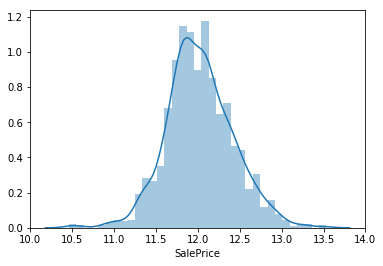

In [328]:
sns.distplot(Y_log,label='Y_log')

In [329]:
X.to_csv('../../Datas/KaggleHouse/X_note_Jan.16.2020.csv')
Y.to_csv('../../Datas/KaggleHouse/Y_note_Jan.16.2020.csv')
Y_log.to_csv('../../Datas/KaggleHouse/Y_log_note_Jan.16.2020.csv')
test_proced.to_csv('../../Datas/KaggleHouse/Y_train_V2_log.csv')

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
